In [145]:
#Bascic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
# from sklearn import preprocessing from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
# import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

# Importing Dataset

In [41]:
sheet_id = '1C9wh8HLncoi4_1OCB-UFmyoMW0h4QYcWswGwC1Qxeik'
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")

In [42]:
df.head

<bound method NDFrame.head of              Name     category product_id    user_id        date      time  \
0    Emma Johnson  Electronics     938562     emma96  2023-04-27     13:23   
1      John Smith         Home     284739  johnsmith  2023-04-30      9:47   
2       Sarah Lee     Clothing     672915  sarah_lee  2023-04-26     18:12   
3       Alex Chen       Beauty     583029   alexc123  2023-05-01     21:01   
4      Rachel Kim       Sports     109385    rachelk  2023-04-28     15:37   
..            ...          ...        ...        ...         ...       ...   
108         David  Electronics      24680      user6  2023-05-01   1:00 PM   
109        Olivia         Toys      78901      user7  2023-04-30  10:30 AM   
110       Jackson        Books       1234      user8  2023-04-29   4:15 PM   
111       Madison        Music      45678      user9  2023-04-28   6:45 PM   
112      Benjamin         Home      24680     user10  2023-04-27  12:00 PM   

                        Email  ra

In [43]:
df

Name     category product_id    user_id        date      time  \
0    Emma Johnson  Electronics     938562     emma96  2023-04-27     13:23   
1      John Smith         Home     284739  johnsmith  2023-04-30      9:47   
2       Sarah Lee     Clothing     672915  sarah_lee  2023-04-26     18:12   
3       Alex Chen       Beauty     583029   alexc123  2023-05-01     21:01   
4      Rachel Kim       Sports     109385    rachelk  2023-04-28     15:37   
..            ...          ...        ...        ...         ...       ...   
108         David  Electronics      24680      user6  2023-05-01   1:00 PM   
109        Olivia         Toys      78901      user7  2023-04-30  10:30 AM   
110       Jackson        Books       1234      user8  2023-04-29   4:15 PM   
111       Madison        Music      45678      user9  2023-04-28   6:45 PM   
112      Benjamin         Home      24680     user10  2023-04-27  12:00 PM   

                        Email  rating  \
0    emma.johnson@example.com       4   
1      john.smith@example.com       3   
2       sarah.lee@example.com       5   
3       alex.chen@example.com       4   
4      rachel.kim@example.com       5   
..                        ...     ...   
108         david@hotmail.com       2   
109          olivia@gmail.com       1   
110         jackson@yahoo.com       1   
111       madison@hotmail.com       2   
112        benjamin@gmail.com       1   

                                              Feedback  Sentiment  
0    jaideepak.s.h.2020.cse@ritchennai.edu.inThe pr...        NaN  
1    @user when a father is dysfunctional and is so...        NaN  
2                      @love the design and quality! 😍        NaN  
3           Works well, but the smell is too strong. 🤢        NaN  
4                 Great product! I use it every day! 👌        NaN  
..                                                 ...        ...  
108     "The product stopped working after one use. 😡"        NaN  
109                "The toy broke after a few days. 😔"        NaN  
110           "The book arrived with pages missing. 🤨"        NaN  
111      "The sound quality was poor and distorted. 😔"        NaN  
112          "The product arrived late and damaged. 😡"        NaN  

[113 rows x 10 columns]

# Preprocessing and cleaning

# Handling NuN values

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        113 non-null    object 
 1   category    113 non-null    object 
 2   product_id  113 non-null    object 
 3   user_id     113 non-null    object 
 4   date        113 non-null    object 
 5   time        113 non-null    object 
 6   Email       113 non-null    object 
 7   rating      113 non-null    int64  
 8   Feedback    113 non-null    object 
 9   Sentiment   0 non-null      float64
dtypes: float64(1), int64(1), object(8)
memory usage: 9.0+ KB


In [45]:
df.describe()

rating  Sentiment
count  113.000000        0.0
mean     3.451327        NaN
std      0.876184        NaN
min      1.000000        NaN
25%      3.000000        NaN
50%      4.000000        NaN
75%      4.000000        NaN
max      5.000000        NaN

In [46]:
df.isnull().sum()

Name            0
category        0
product_id      0
user_id         0
date            0
time            0
Email           0
rating          0
Feedback        0
Sentiment     113
dtype: int64

# Counting Rating values

In [47]:
df['rating'].value_counts()

4    60
3    34
2     9
5     5
1     5
Name: rating, dtype: int64

In [48]:
df['category'].value_counts()

Beauty           15
Electronics      14
Home             12
Clothing         12
Sports           12
Food             12
Health            8
Books             8
Toys              8
Music             8
Home & Garden     4
Name: category, dtype: int64

In [49]:
df['Feedback'].value_counts()

The product didn't work as well as I had hoped                                        5
The product didn't work for me, but the customer service was helpful                  2
jaideepak.s.h.2020.cse@ritchennai.edu.inThe product works great! 👍                    1
This product exceeded my expectations, it is well-made and looks great in my home.    1
I absolutely love this product, it has made a huge difference in my skin.             1
                                                                                     ..
The product helped me feel better, I would recommend it                               1
The food was delicious and arrived on time                                            1
The product broke after a few uses, I was disappointed                                1
The product was exactly what I was looking for                                        1
"The product arrived late and damaged. 😡"                                             1
Name: Feedback, Length: 108, dty

In [50]:
clean_Text = []
for review in df['Feedback']:
    clean_Text.append( " ".join(cleaning(review)))
    
clean_summary = []
for review in df['Feedback']:
    clean_summary.append( " ".join(cleaning(review)))

In [51]:
def cleaning( review, remove_stopwords=True):
   
    

    review_text = re.sub("[^a-zA-Z]"," ", review)
   
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer 
    for word in words:
        b.append(stemmer.stem(word))

    
    return(b)

In [52]:
Top_Words_Review =pd.Series(' '.join(clean_Text).lower().split()).value_counts()[:10]
print ("Top Count Words Used In Review", Top_Words_Review)

Top Count Words Used In Review product    62
work       24
great      17
well       16
good       15
qualiti    14
expect     12
arriv      11
bit        11
food        9
dtype: int64


In [53]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "Positive"
    elif label == 3.0:
        return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "Negative"

In [54]:
df['Sentiment'] = df["rating"].apply(sentiment)

In [55]:
df

Name     category product_id    user_id        date      time  \
0    Emma Johnson  Electronics     938562     emma96  2023-04-27     13:23   
1      John Smith         Home     284739  johnsmith  2023-04-30      9:47   
2       Sarah Lee     Clothing     672915  sarah_lee  2023-04-26     18:12   
3       Alex Chen       Beauty     583029   alexc123  2023-05-01     21:01   
4      Rachel Kim       Sports     109385    rachelk  2023-04-28     15:37   
..            ...          ...        ...        ...         ...       ...   
108         David  Electronics      24680      user6  2023-05-01   1:00 PM   
109        Olivia         Toys      78901      user7  2023-04-30  10:30 AM   
110       Jackson        Books       1234      user8  2023-04-29   4:15 PM   
111       Madison        Music      45678      user9  2023-04-28   6:45 PM   
112      Benjamin         Home      24680     user10  2023-04-27  12:00 PM   

                        Email  rating  \
0    emma.johnson@example.com       4   
1      john.smith@example.com       3   
2       sarah.lee@example.com       5   
3       alex.chen@example.com       4   
4      rachel.kim@example.com       5   
..                        ...     ...   
108         david@hotmail.com       2   
109          olivia@gmail.com       1   
110         jackson@yahoo.com       1   
111       madison@hotmail.com       2   
112        benjamin@gmail.com       1   

                                              Feedback Sentiment  
0    jaideepak.s.h.2020.cse@ritchennai.edu.inThe pr...  Positive  
1    @user when a father is dysfunctional and is so...   Neutral  
2                      @love the design and quality! 😍  Positive  
3           Works well, but the smell is too strong. 🤢  Positive  
4                 Great product! I use it every day! 👌  Positive  
..                                                 ...       ...  
108     "The product stopped working after one use. 😡"  Negative  
109                "The toy broke after a few days. 😔"  Negative  
110           "The book arrived with pages missing. 🤨"  Negative  
111      "The sound quality was poor and distorted. 😔"  Negative  
112          "The product arrived late and damaged. 😡"  Negative  

[113 rows x 10 columns]

# Sentiment Analysis

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=4, max_features = 10000)
vz = vectorizer.fit_transform(clean_Feedback)
tfidf = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
print("work : " + str(tfidf["well"]))
print("good: " + str(tfidf["good"]))
print("expect : " + str(tfidf["bit"]))
print("music: " + str(tfidf["music"]))
print("arriv: " + str(tfidf["arriv"]))

work : 2.9029851043382795
good: 2.963609726154714
expect : 3.2512917986064953
music: 3.6567569067146595
arriv: 3.2512917986064953


In [57]:
clean_Feedback = []
for review in df['Feedback']:
    clean_Feedback.append( " ".join(cleaning(review)))

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
Senti = SentimentIntensityAnalyzer()
sample_review = clean_Text[:100]
for sentence in sample_review:
    sentence
    ss = Senti.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(sentence) 
    

compound: 0.6249, 
neg: 0.0, 
neu: 0.631, 
pos: 0.369, 
jaideepak h cse ritchennai edu inth product work great
compound: -0.6124, 
neg: 0.5, 
neu: 0.5, 
pos: 0.0, 
user father dysfunct selfish drag kid dysfunct
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
love design qualiti
compound: 0.6597, 
neg: 0.0, 
neu: 0.27, 
pos: 0.73, 
work well smell strong
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
great product use everi day
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
flavor bit bland need season
compound: 0.3612, 
neg: 0.0, 
neu: 0.545, 
pos: 0.455, 
product chang life thank
compound: 0.4215, 
neg: 0.0, 
neu: 0.208, 
pos: 0.792, 
okay worth price
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
wast product
compound: 0.6249, 
neg: 0.0, 
neu: 0.423, 
pos: 0.577, 
great qualiti fast ship
compound: 0.765, 
neg: 0.0, 
neu: 0.312, 
pos: 0.688, 
materi great fit littl tight
compound: 0.2732, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
devic work well batteri life could imp

In [61]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 10
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :5]:
        print(' %s' % terms[j])
    print()

Cluster 0:
 work
 well
 product
 hope
 easi

Cluster 1:
 great
 qualiti
 music
 book
 use

Cluster 2:
 bit
 book
 good
 small
 time

Cluster 3:
 exact
 look
 product
 arriv
 work

Cluster 4:
 expect
 product
 good
 work
 easi

Cluster 5:
 toy
 entertain
 love
 hope
 great

Cluster 6:
 help
 improv
 product
 servic
 custom

Cluster 7:
 food
 cloth
 delici
 high
 arriv

Cluster 8:
 price
 okay
 product
 great
 high

Cluster 9:
 product
 damag
 good
 arriv
 love



In [64]:
Text = df.Feedback
Ratings = df.rating
vectorizer = TfidfVectorizer(max_df=.8)
vectorizer.fit(Text)
def categorize(ratings):
    cats = []
    for rating in ratings:
        v = [0,0,0,0,0]
        v[int(rating)-1] = 1
        cats.append(v)
    return np.array(cats)

X = vectorizer.transform(Text).toarray()
y = categorize(Ratings.values)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = Sequential()
model.add(Dense(128,input_dim=X_train.shape[1]))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)
model.evaluate(X_test,y_test)[1]

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 1.5701 - accuracy: 0.3444
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 1.4289 - accuracy: 0.7111
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 1.3311 - accuracy: 0.7000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.2479 - accuracy: 0.6889
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 1.1743 - accuracy: 0.6778
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.1067 - accuracy: 0.6444
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0483 - accuracy: 0.6444
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9931 - accuracy: 0.6778
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9447 - accuracy: 0.6556
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8981 - accuracy: 0.6778
Epoch 11/100
3/3 [===========

3/3 [==============================] - 0s 6ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 85/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 86/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 87/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 88/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 94/100
3/3 [===============

0.6086956262588501

In [75]:
pd.DataFrame(df.groupby('Sentiment')['rating'].mean())

rating
Sentiment          
Negative   1.642857
Neutral    3.000000
Positive   4.076923

# Analysing Sentiment using Unique Userid

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before : {}".format(len(df)))
dfAfter = df.dropna(subset=["rating"])
# Removes all NAN in reviews.rating
print("After  : {}".format(len(dfAfter)))
dfAfter["rating"] = dfAfter["rating"].astype(int)

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
for train_index, test_index in split.split(dfAfter,
                                           dfAfter["rating"]):
    strat_train = dfAfter.reindex(train_index)
    strat_test = dfAfter.reindex(test_index)

Before : 113
After  : 113


In [82]:
print(len(strat_train))
print(len(strat_test))
round((strat_test["rating"].value_counts()* 100/len(strat_test)),2)

90
23


4    52.17
3    30.43
2     8.70
1     4.35
5     4.35
Name: rating, dtype: float64

In [83]:
reviews = strat_train.copy()
reviews.head()

Name     category product_id  user_id        date      time  \
100     Noah Garcia       Beauty    BEA1234   USR345  2022-11-08  13:45:00   
23     Benjamin Kim  Electronics   ELEC1234   USR456  2022-10-20  11:10:00   
66      Ava Johnson     Clothing    CLO3456   USR901  2022-11-14  16:15:00   
70   Chloe Martinez  Electronics   ELEC3456   USR456  2023-01-22  13:25:00   
88       Ashley Lee         Food  PRD000006  USR0006  2022-02-05   6:30 PM   

                          Email  rating  \
100     noah.garcia@example.com       4   
23     benjamin.kim@example.com       3   
66      ava.johnson@example.com       4   
70   chloe.martinez@example.com       4   
88       ashley.lee@example.com       3   

                                              Feedback Sentiment  
100  The product was of good quality, but the scent...  Positive  
23   The product worked well initially but started ...   Neutral  
66    The clothing was great quality and fit perfectly  Positive  
70    The product worked perfectly and was easy to use  Positive  
88   The product tasted good, but the packaging was...   Neutral

In [84]:
len(reviews["Name"].unique())

82

In [85]:
len(reviews["user_id"].unique())

41

In [86]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 100 to 80
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        90 non-null     object
 1   category    90 non-null     object
 2   product_id  90 non-null     object
 3   user_id     90 non-null     object
 4   date        90 non-null     object
 5   time        90 non-null     object
 6   Email       90 non-null     object
 7   rating      90 non-null     int32 
 8   Feedback    90 non-null     object
 9   Sentiment   90 non-null     object
dtypes: int32(1), object(9)
memory usage: 7.4+ KB


In [87]:
reviews.groupby("user_id")["Feedback"].unique()

user_id
USR0001      [The product was okay, but it arrived later th...
USR0002      [I absolutely love this product, it has made a...
USR0003      [The shirt I bought was too small, even though...
USR0004      [This product exceeded my expectations, it is ...
USR0005      [The product is exactly what I needed, it work...
USR0006      [The product tasted good, but the packaging wa...
USR0007      [This product is great, but it is a bit expens...
USR0009      [This product is exactly what I was looking fo...
USR0010      [The product is good, but it didn't quite meet...
USR002       [The shirt I bought was a bit too small, but t...
USR003       [The product arrived damaged and customer serv...
USR004       [Absolutely love this product, would highly re...
USR005       [The product is exactly as advertised, very sa...
USR006       [The product tasted good, but the portion size...
USR008       [The dress I ordered didn't fit properly, but ...
USR009       [The product is high quality and a

In [88]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["rating"].apply(sentiments)
print(strat_train["Sentiment"][:15])

100    Positive
23      Neutral
66     Positive
70     Positive
88      Neutral
84     Positive
56     Positive
109    Negative
112    Negative
0      Positive
91      Neutral
27     Positive
43     Positive
68     Positive
45      Neutral
Name: Sentiment, dtype: object


In [89]:
round((strat_train["Sentiment"].value_counts()*100/len(strat_train)),2)

Positive    57.78
Neutral     30.00
Negative    12.22
Name: Sentiment, dtype: float64

In [90]:
round((strat_test["Sentiment"].value_counts()*100/len(strat_test)),2)

Positive    56.52
Neutral     30.43
Negative    13.04
Name: Sentiment, dtype: float64

In [99]:
model = Sequential()
model.add(Embedding(500, 120, input_length= X.shape[1]))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 246, 120)          60000     
                                                                 
 lstm (LSTM)                 (None, 64)                47360     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 107,425
Trainable params: 107,425
Non-trainable params: 0
_________________________________________________________________
None


# Analysis Using Graph

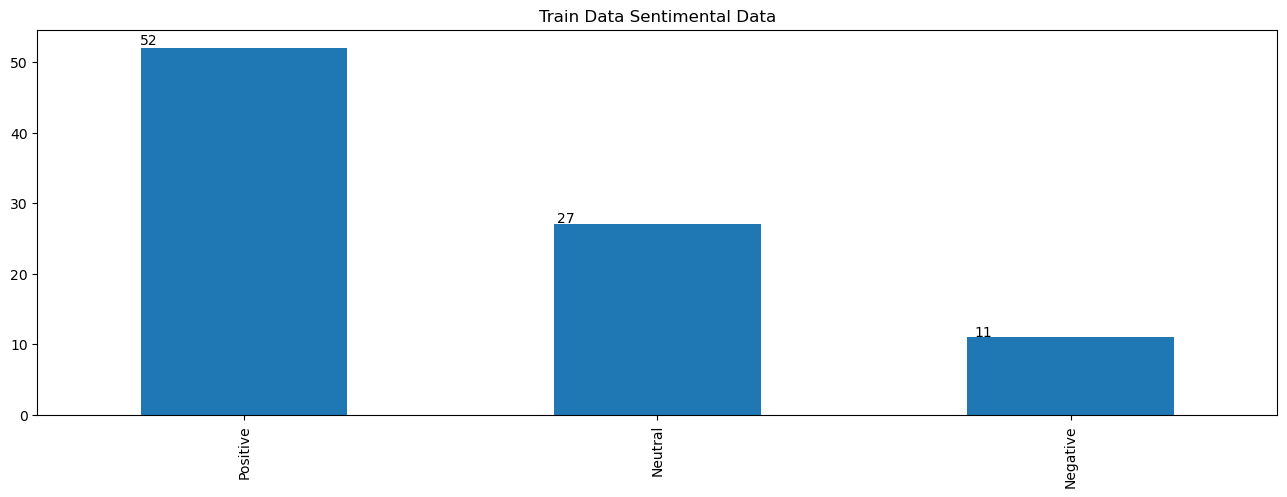

In [91]:
fig = plt.figure(figsize=(16,5))
ax=strat_train["Sentiment"].value_counts().plot(kind="bar", title="Train Data Sentimental Data")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

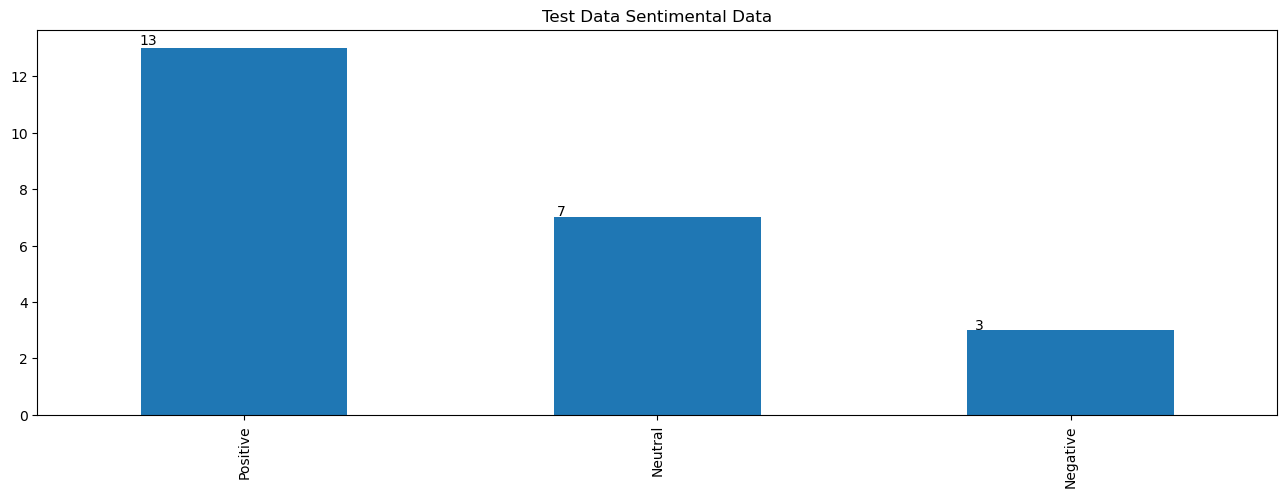

In [92]:
fig = plt.figure(figsize=(16,5))
ax=strat_test["Sentiment"].value_counts().plot(kind="bar", title="Test Data Sentimental Data")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

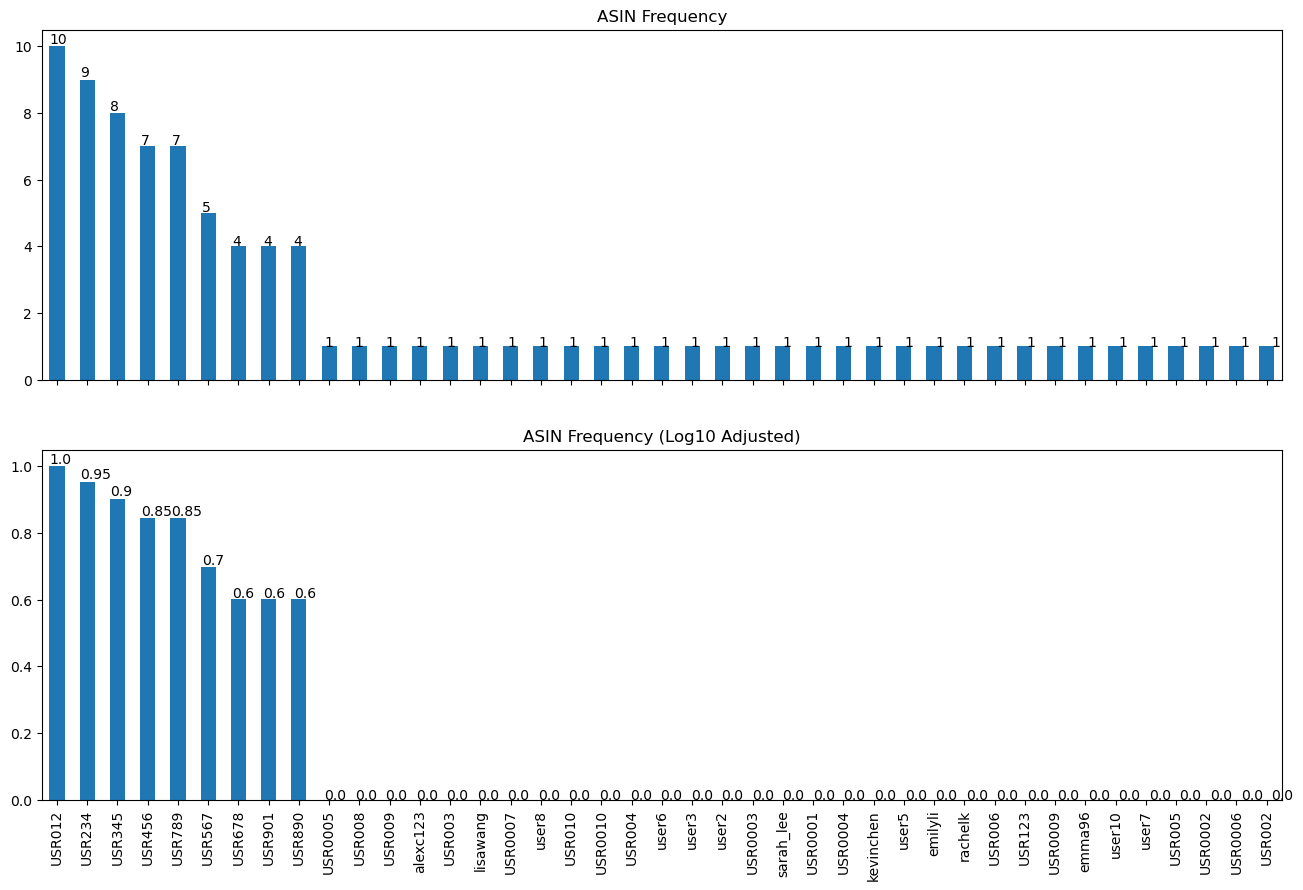

In [93]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["user_id"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["user_id"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
for p in ax2.patches:
    ax2.annotate(str(round((p.get_height()),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

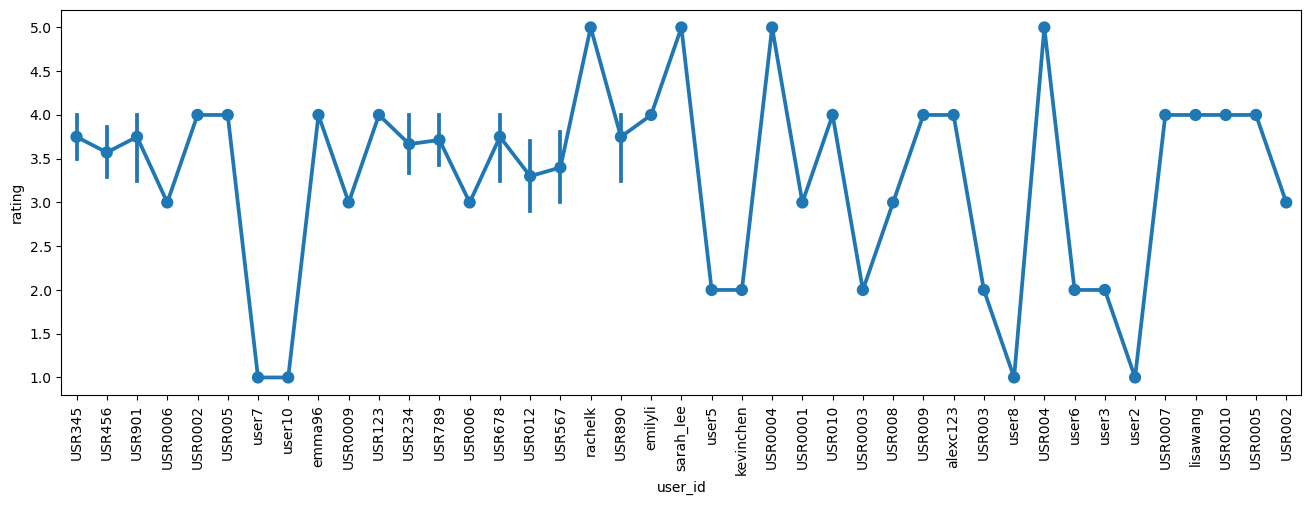

In [94]:
fig = plt.figure(figsize=(16,5))
sns.pointplot(x="user_id", y="rating",  data=reviews)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='rating', ylabel='count'>

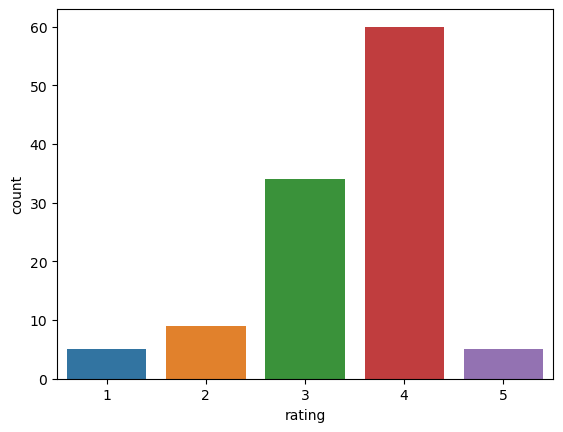

In [95]:
sns.countplot(x='rating', data=df)

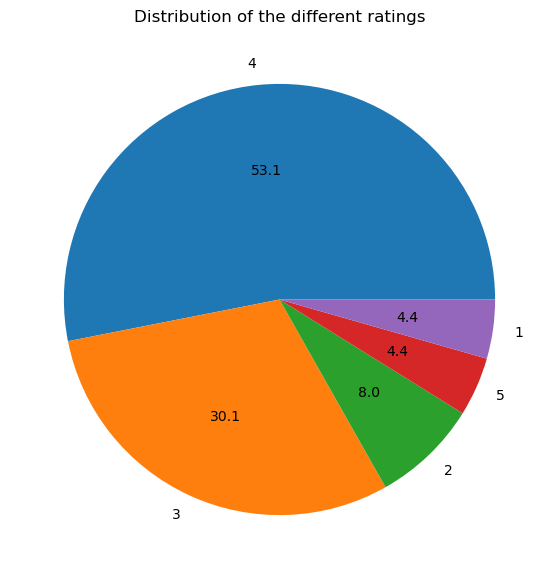

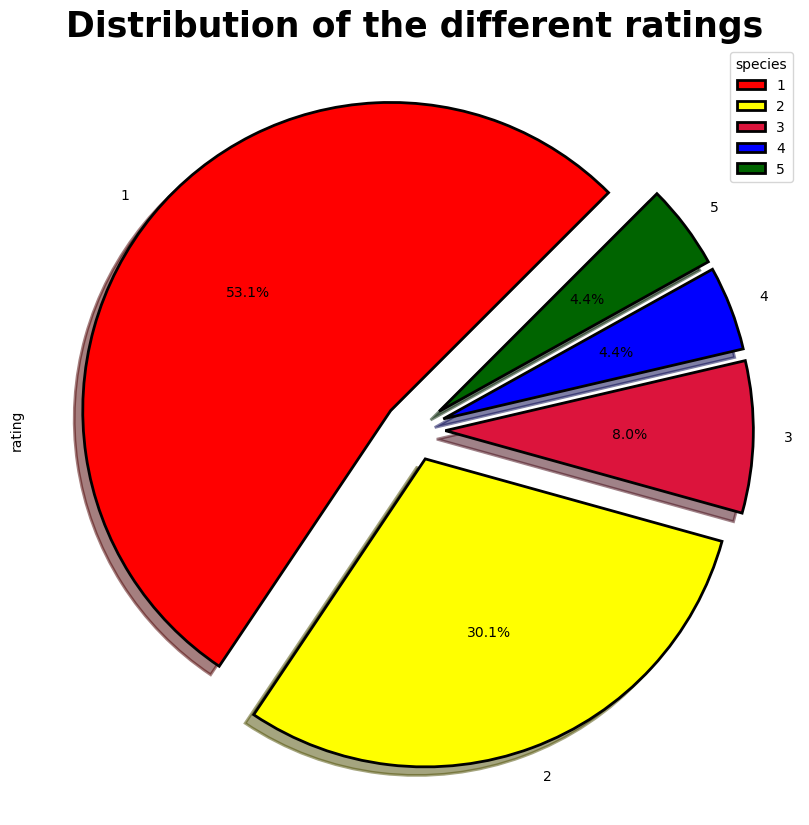

In [96]:
fig = plt.figure(figsize=(7,7))
tags = df['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('Distribution of the different ratings')
plt.show()

fig = plt.figure(figsize=(10,10))
colors = ("red", "yellow", "crimson", "blue", "darkgreen") 
wp = {'linewidth':2, 'edgecolor':"black"} 
data = df['rating'].value_counts()
explode = (0.1,0.1,0.1, 0.1,0.1)
classes = ['1','2','3','4','5']
data.plot(kind='pie', autopct='%0.1f%%',labels=classes, startangle = 45, colors = colors,
         explode = explode, shadow=True, wedgeprops = wp)
plt.legend(title="species")
plt.title("Distribution of the different ratings", loc='center', color='black', fontsize='25', fontweight='bold')
plt.show()

<Axes: xlabel='count', ylabel='category'>

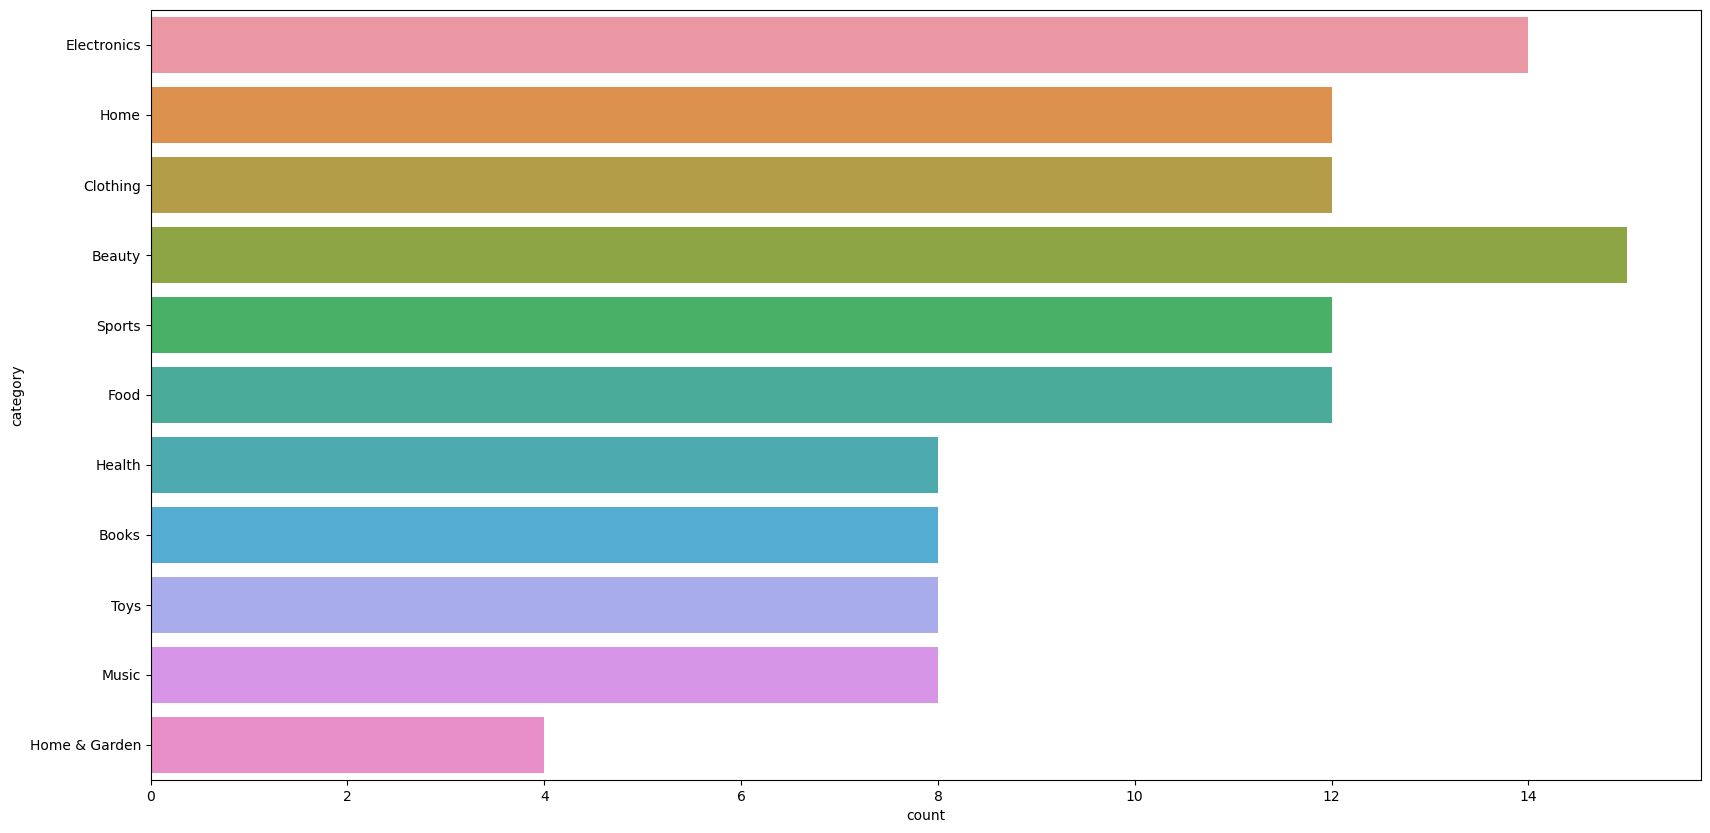

In [97]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='category', data=df)

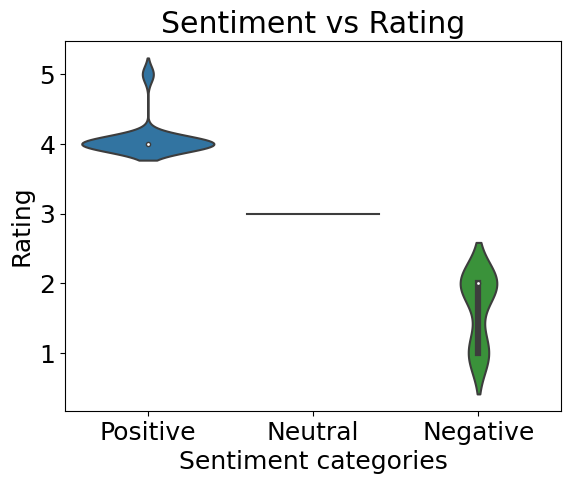

In [111]:
#plot layout
plt.rcParams.update({'font.size': 18})
# rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(df, columns = ['Sentiment', 'rating'])
senti_help = senti_help[senti_help['rating'] != 0.00] 

#Plotting phase
sns.violinplot( x=senti_help["Sentiment"], y=senti_help["rating"])
plt.title('Sentiment vs Rating')
plt.xlabel('Sentiment categories')
plt.ylabel('Rating')
plt.show()

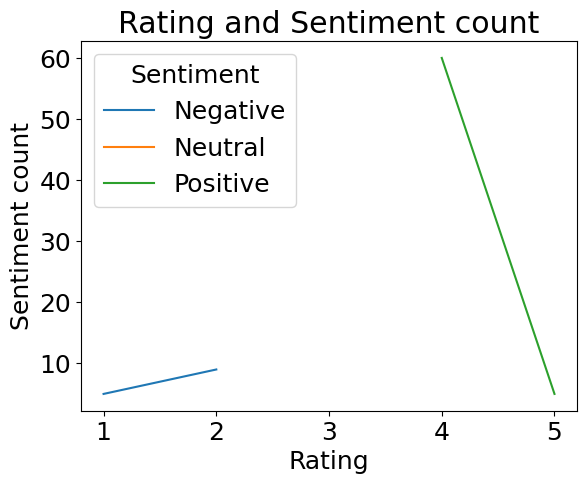

In [121]:
df.groupby(['rating','Sentiment'])['Sentiment'].count().unstack().plot(legend=True)
plt.title('Rating and Sentiment count')
plt.xlabel('Rating')
plt.ylabel('Sentiment count')
plt.show()

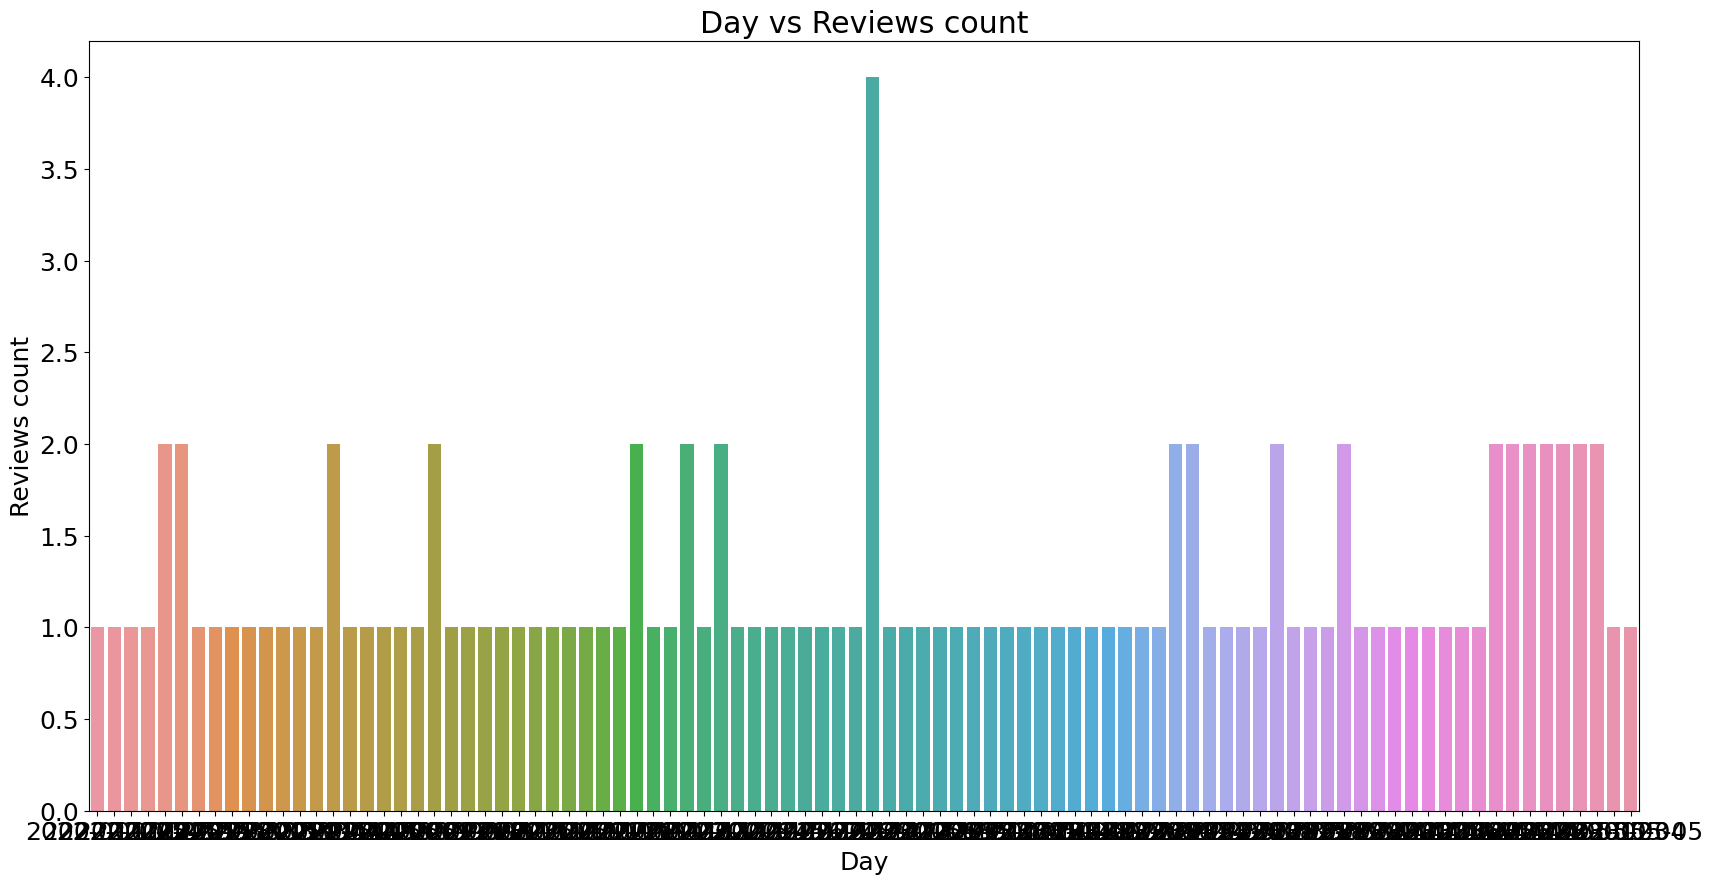

In [131]:
day=pd.DataFrame(df.groupby('date')['Feedback'].count()).reset_index()
day['date']=day['date'].astype('str')
day.sort_values(by=['date'])
fig = plt.figure(figsize=(20,10))

#Plotting the graph
sns.barplot(x="date", y="Feedback", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

In [147]:
review_pos = df[df["Sentiment"]=='Positive'].dropna()
review_neu = df[df["Sentiment"]=='Neutral'].dropna()
review_neg = df[df["Sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Feedback"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Feedback"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Feedback"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

In [148]:
freq_dict = defaultdict(int)
for sent in review_pos["Feedback"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Feedback"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Feedback"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

In [152]:
for sent in review_pos["Feedback"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Feedback"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Feedback"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

# Wordcloud

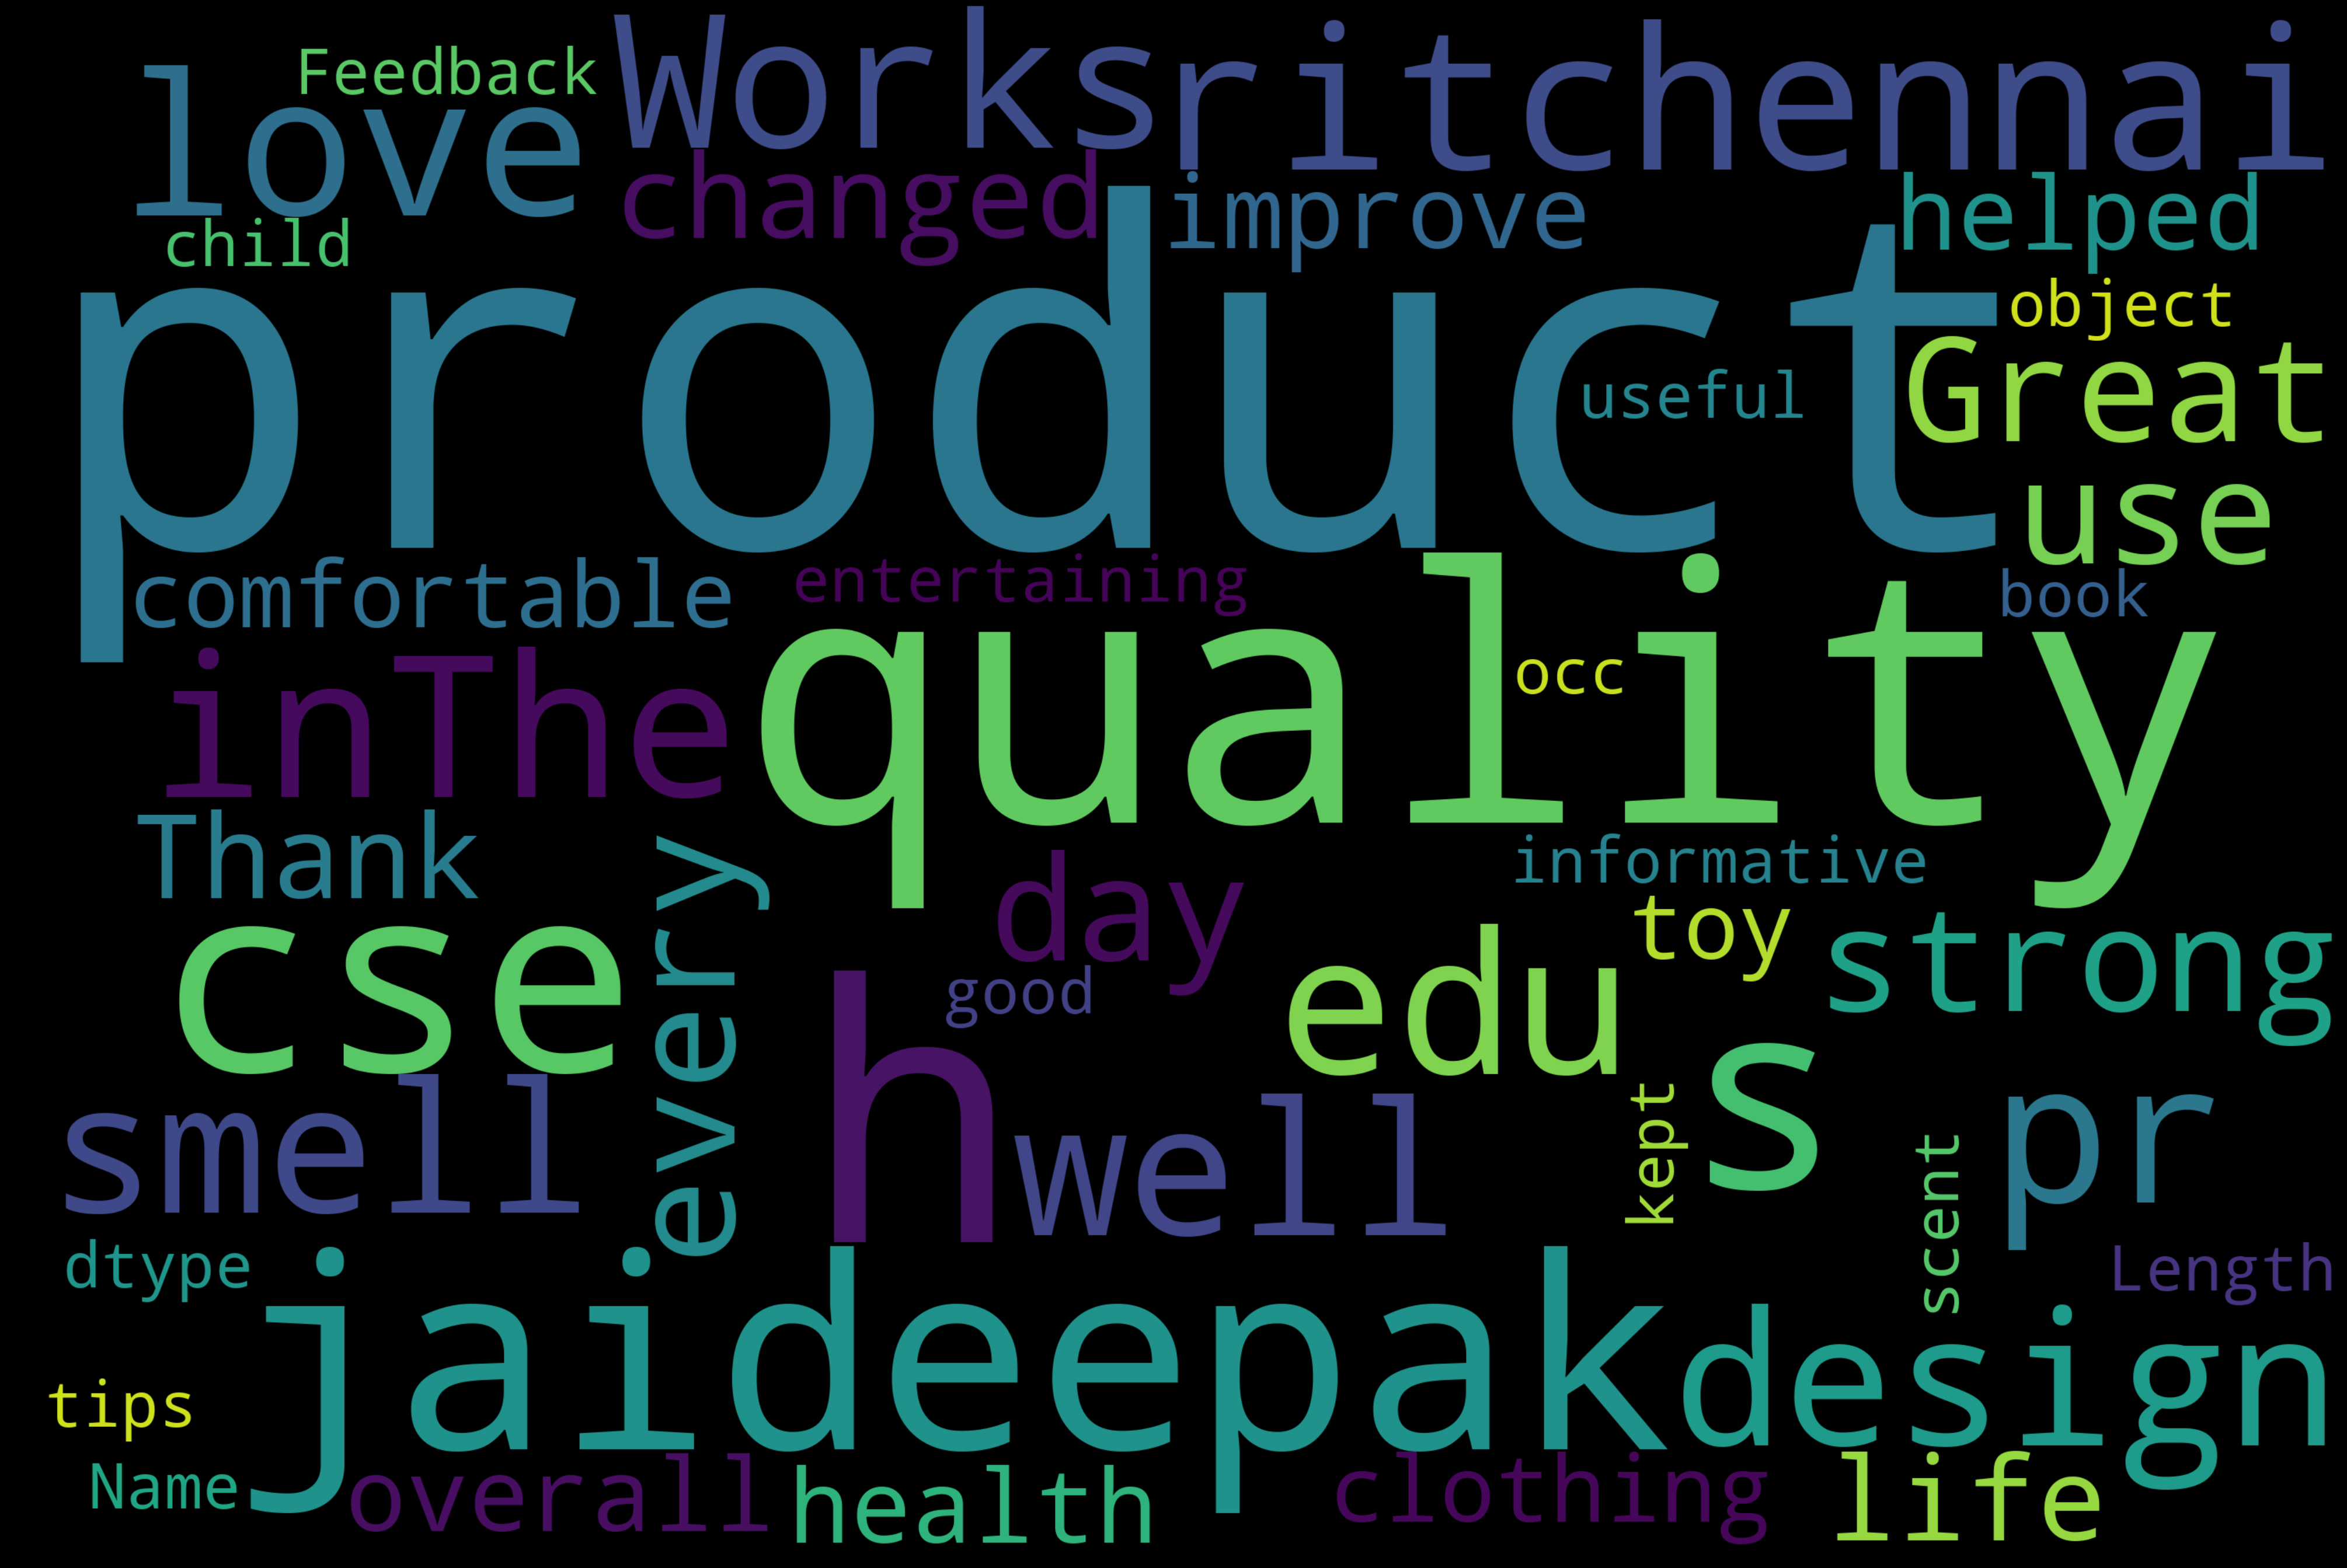

In [153]:
text = review_pos["Feedback"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

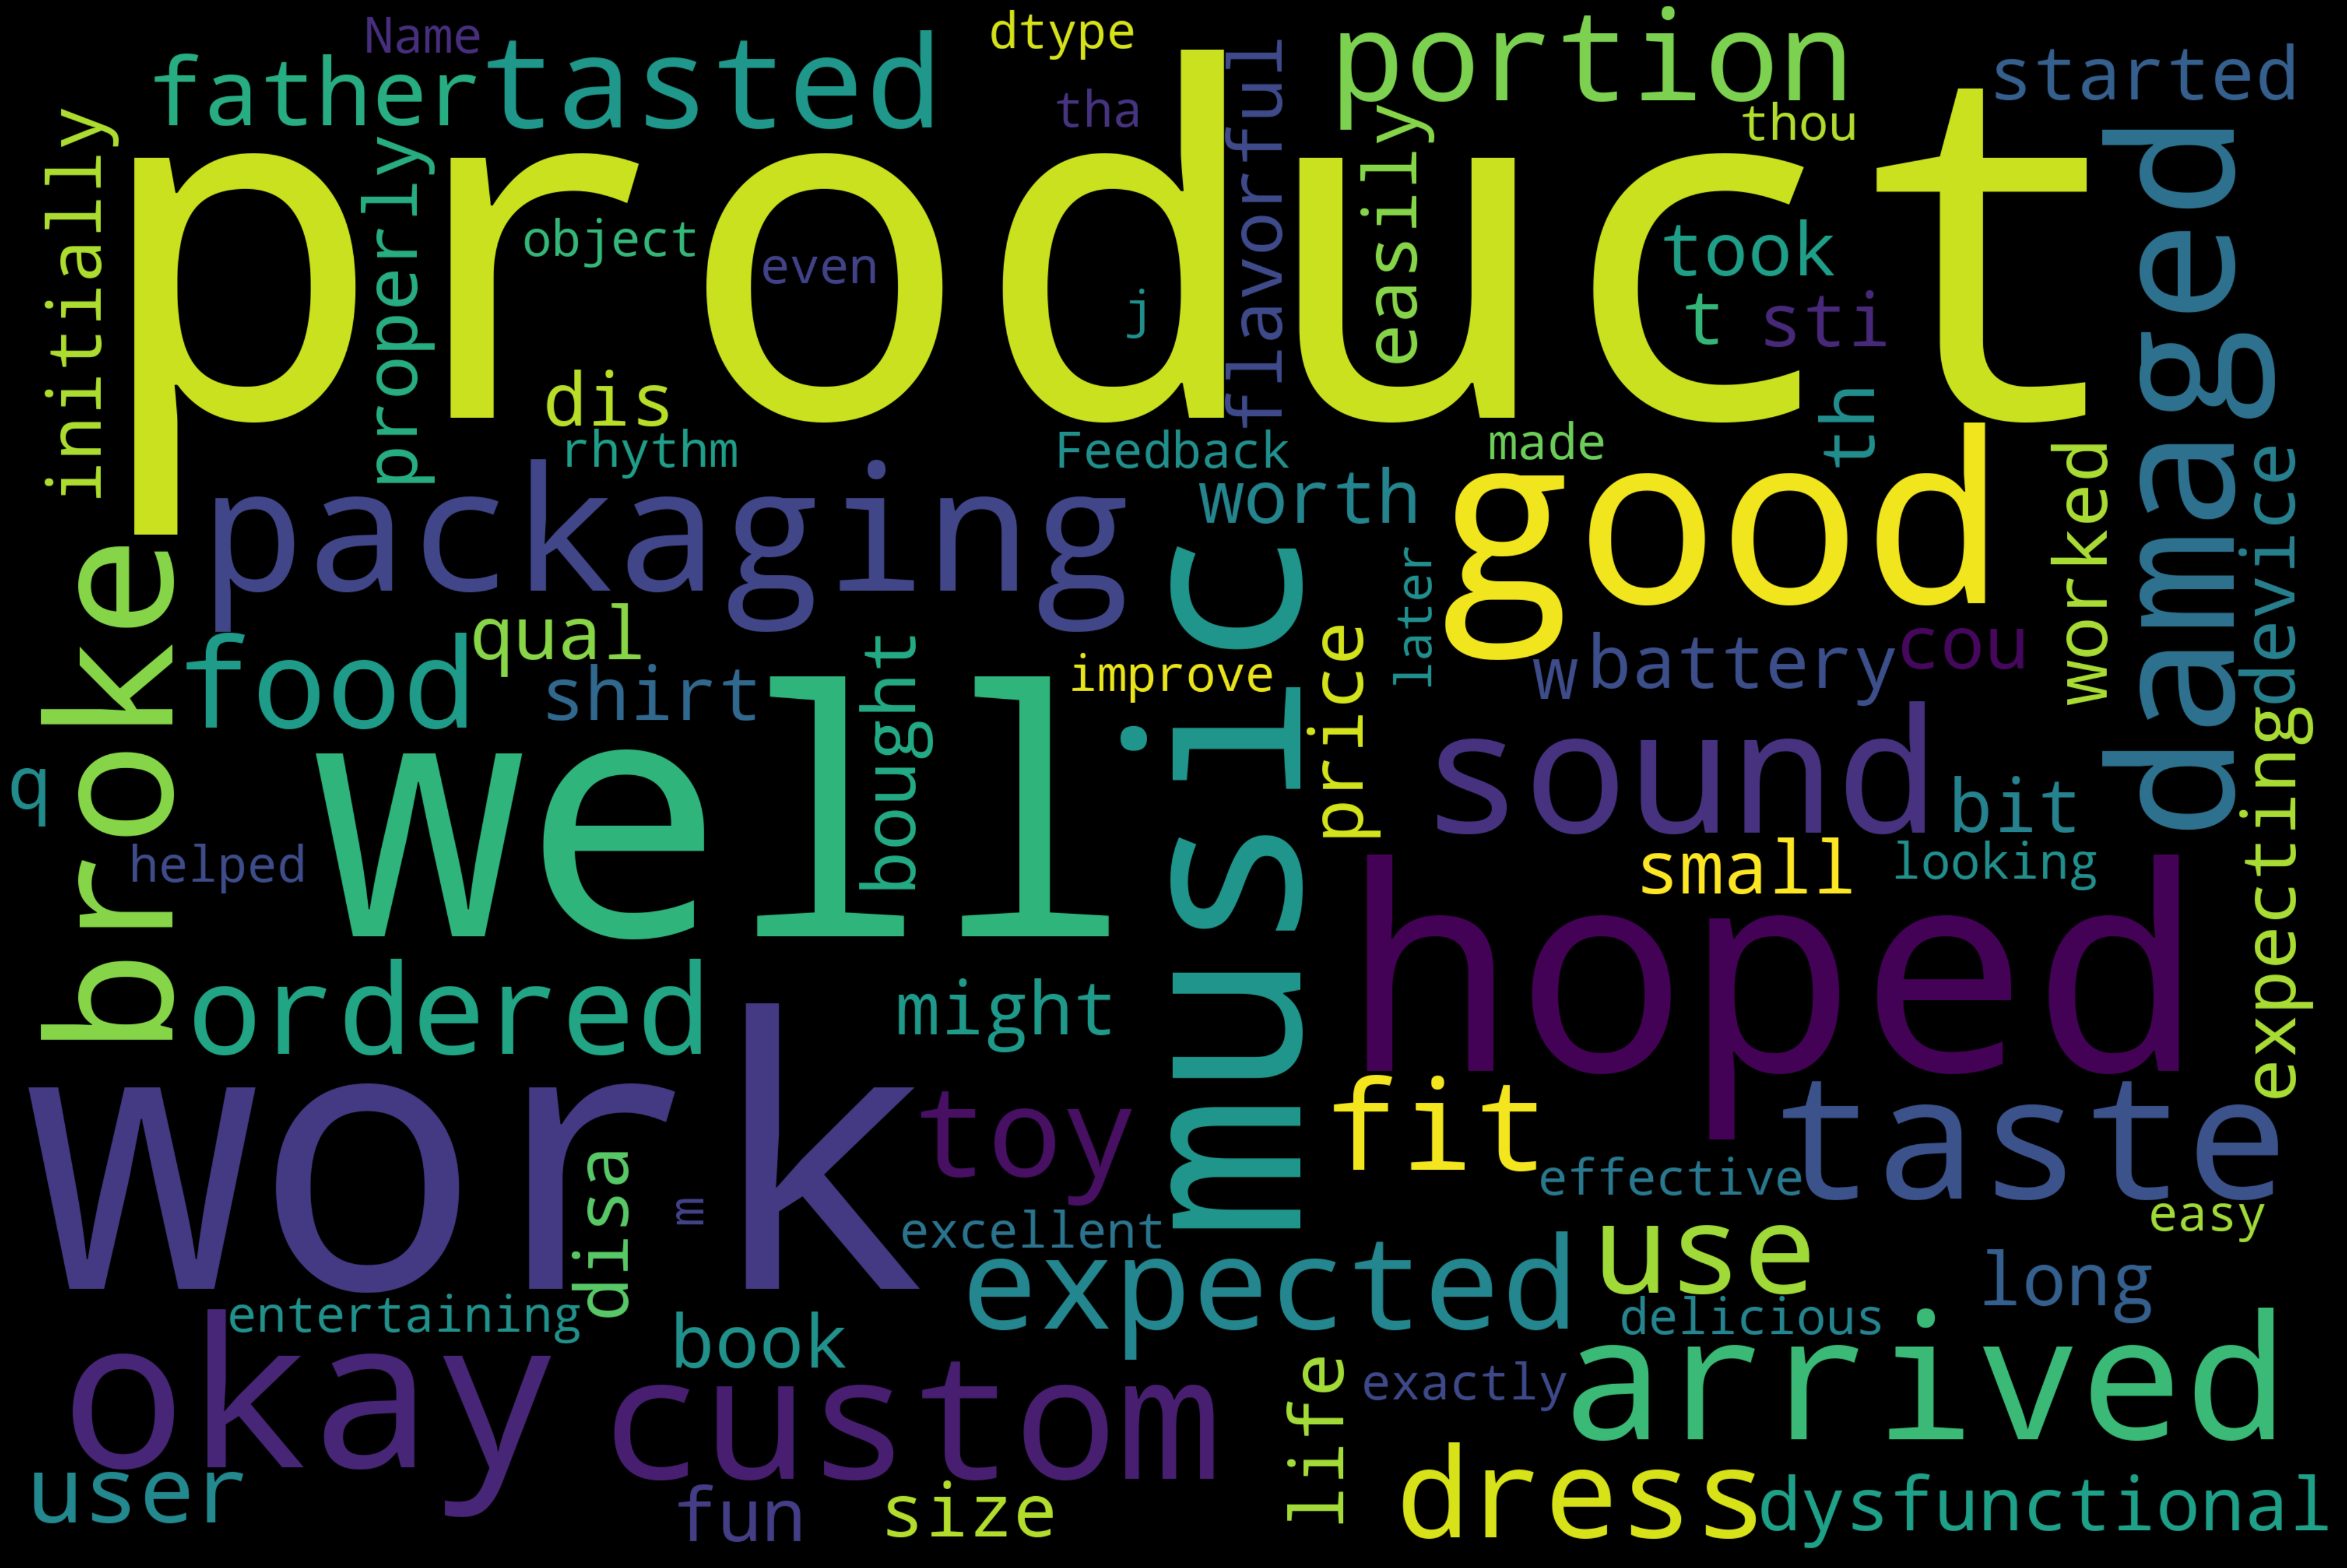

In [154]:
text = review_neu["Feedback"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = review_neg["Feedback"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()